File contain two solution for polynomial curve fitting.

    1. Math Matical impementation of Polynomial fitting using least sqaure method solution
        ``` w = inv(XT.X).XY.y```
        XT = Transpose of X
        Cell 1
    2. Numpy polyfit function
        Cell 2


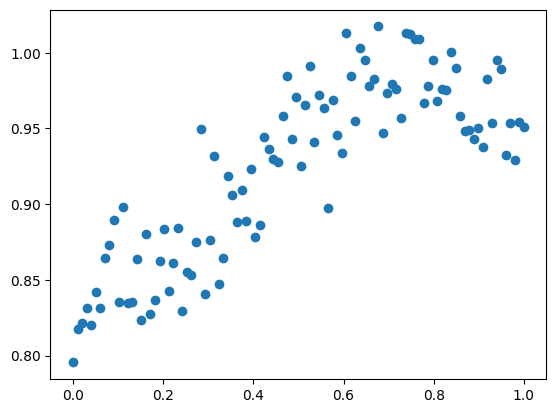

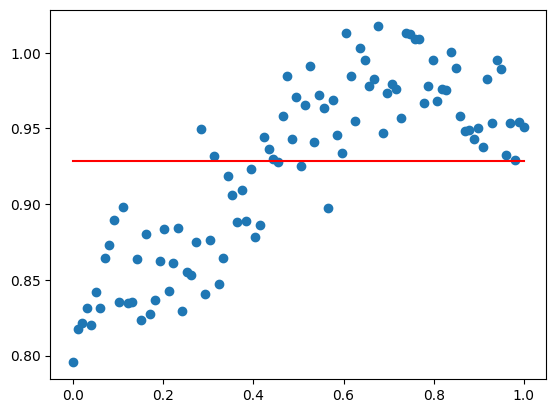

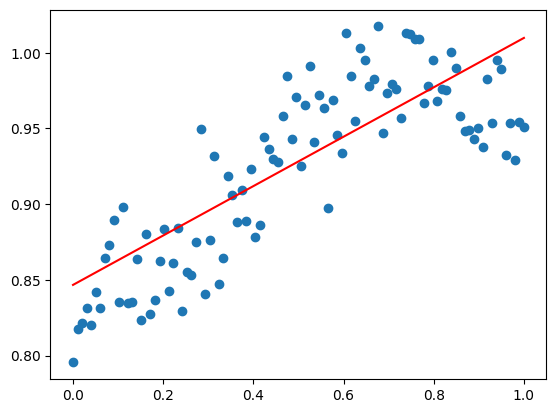

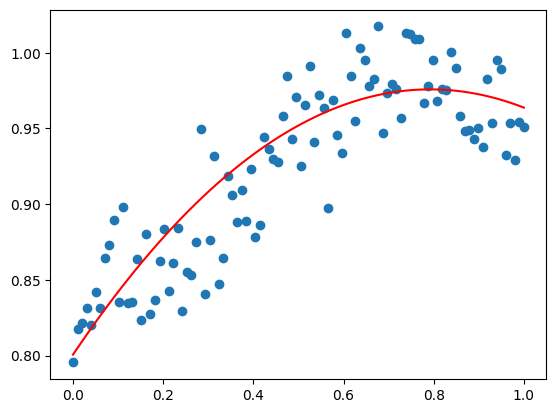

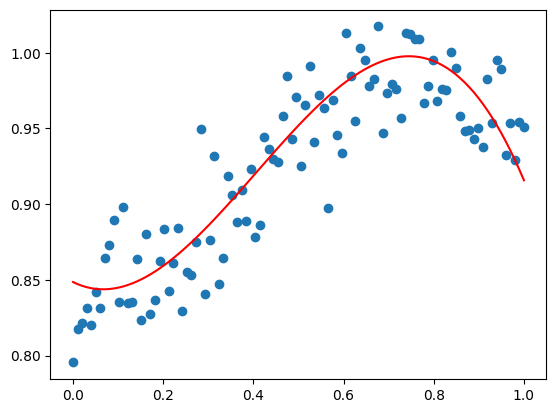

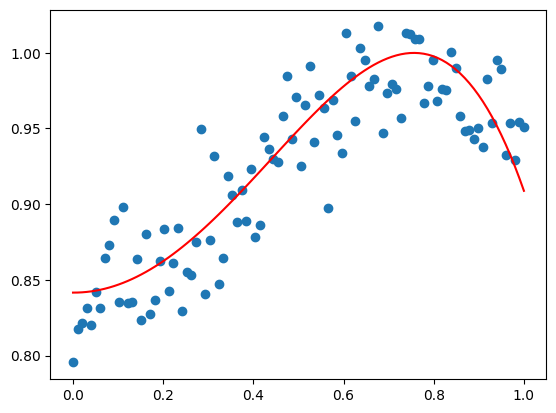

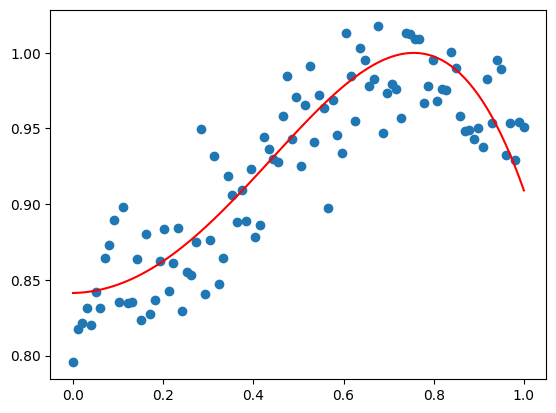

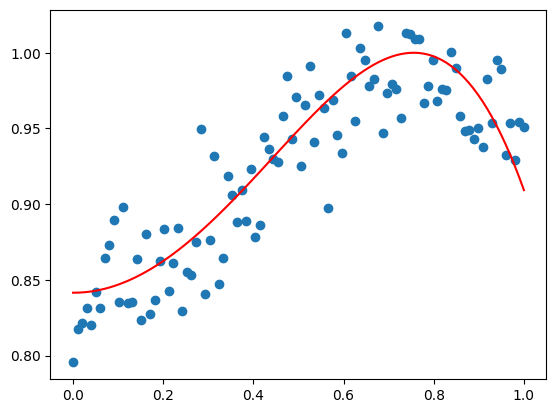

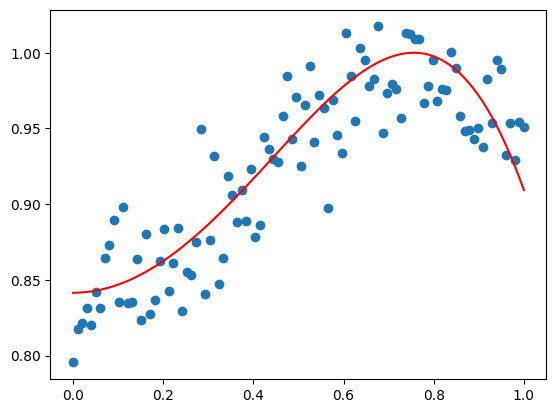

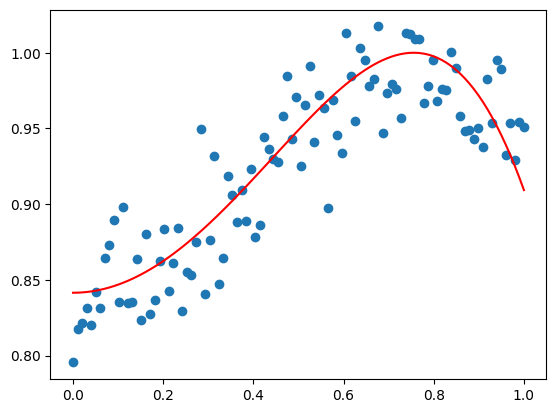

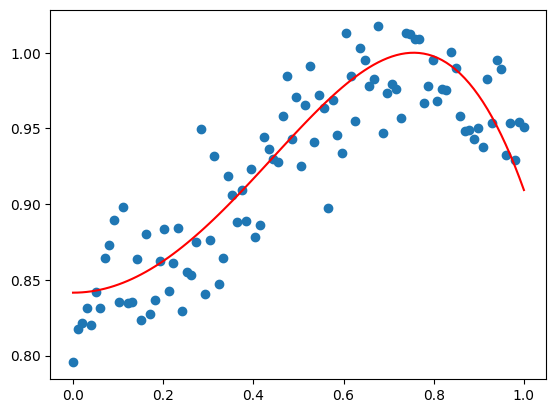

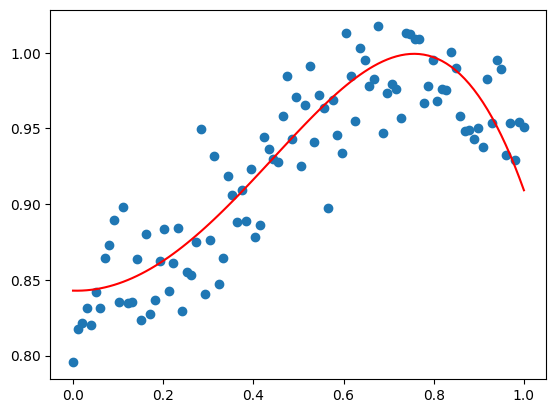

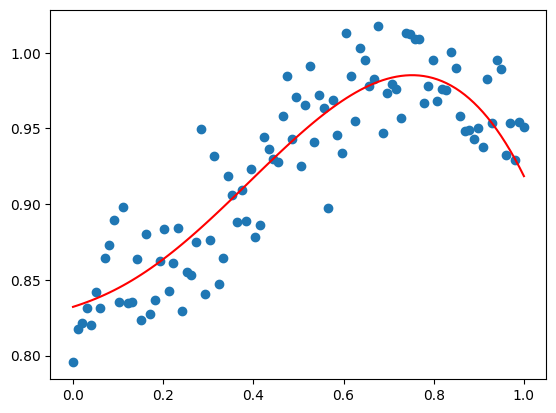

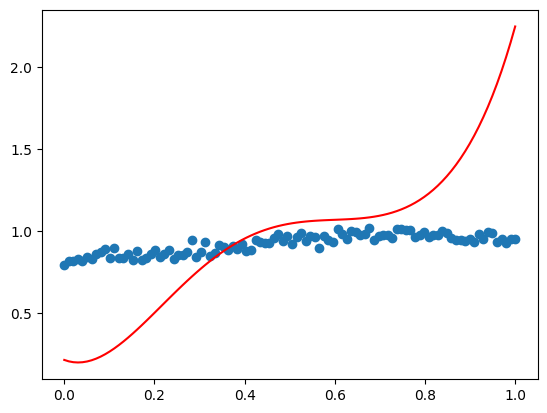

In [2]:
# Math Matical - Manual Approach
# Numpy Polifit In Next Cell - cell2

import matplotlib.pyplot as plt
import numpy as np
from numpy import transpose
from numpy.linalg import inv
import random

random.seed(100)

#Create data points

x = np.linspace(0, 1, num=100)
y = np.sin(1 + x**2)

noise = np.random.normal(0, 0.03, size=x.shape)

y_noise = y + noise

plt.scatter(x,y_noise)
plt.show()


for power in range(13):
    X = np.empty((len(x), power + 1))

    #Fill X matrix 
    # example of matrix X 
    """
        X = [
                [1, x, x^2, .., x^power],
                [1, x, x^2, .., x^power],
                [1, x, x^2, .., x^power]
            ]
    """
    for i, row in enumerate(X):	
        for j in range(power + 1):
            X[i,j] = x[i]**j

    XT = transpose(X)

    #Create Y matrix
    Y = transpose([y_noise])

    w = np.dot(np.dot(inv(np.dot(XT,X)),XT),y) 

    x_reg = np.linspace(0, 1, num=100)

    # Use the values contained in w to calculate y (y = w + w1*x + w2*x^2 + w3*x^3 + ... )
    y_reg = np.empty((1,100)) #create empty y set
    for i in range(100):
        y_reg[0,i] = 0 
        for j in range(power + 1): #y_reg is the sum of the power coefficient * x to that power
            y_reg[0,i] += w[j]*x_reg[i]**j

    plt.scatter(x, y_noise)
    #plot the regression
    plt.plot(x_reg,y_reg[0], color='red' )
    plt.show()




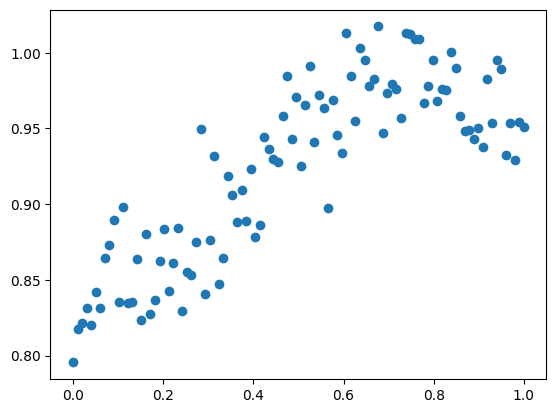

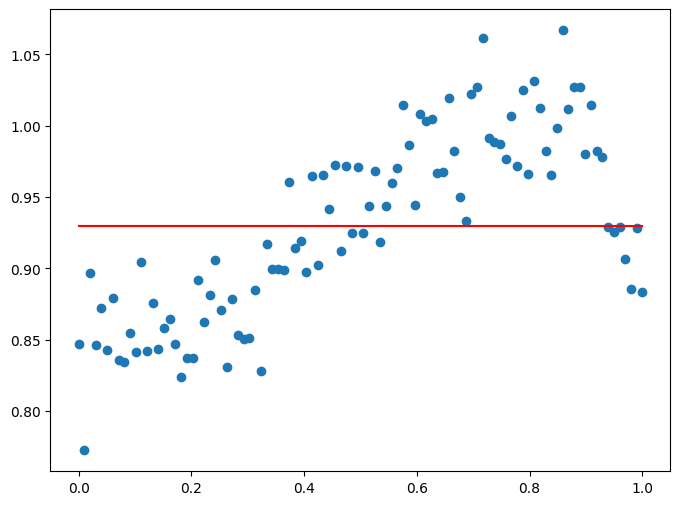

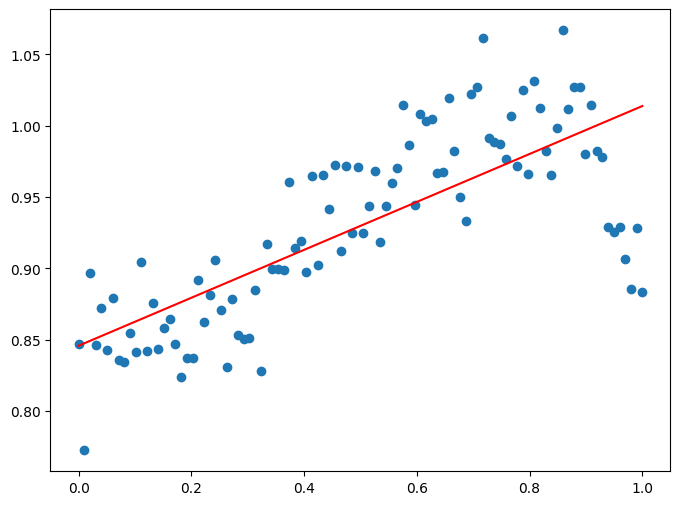

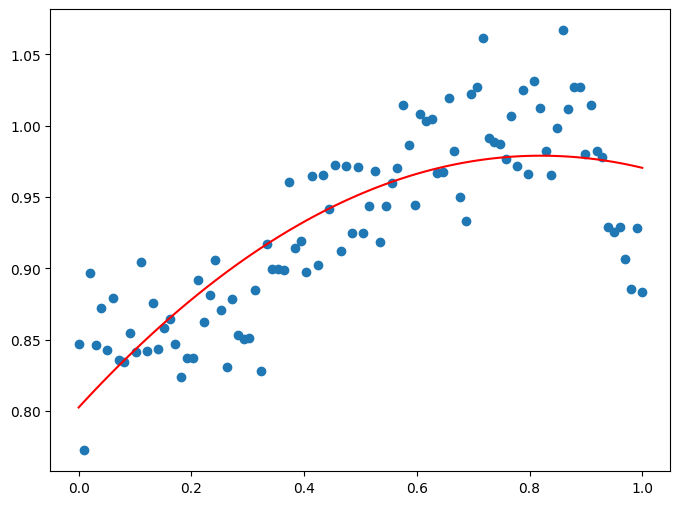

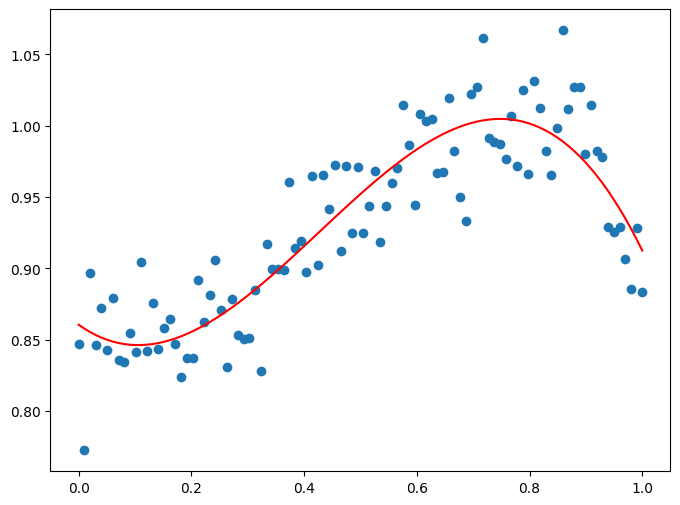

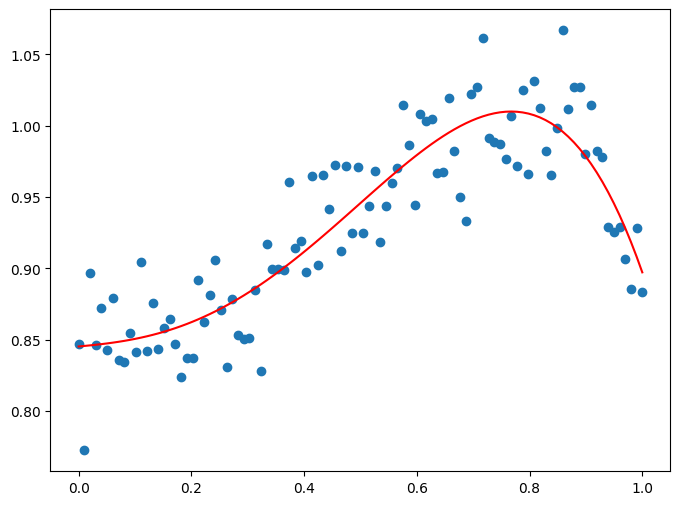

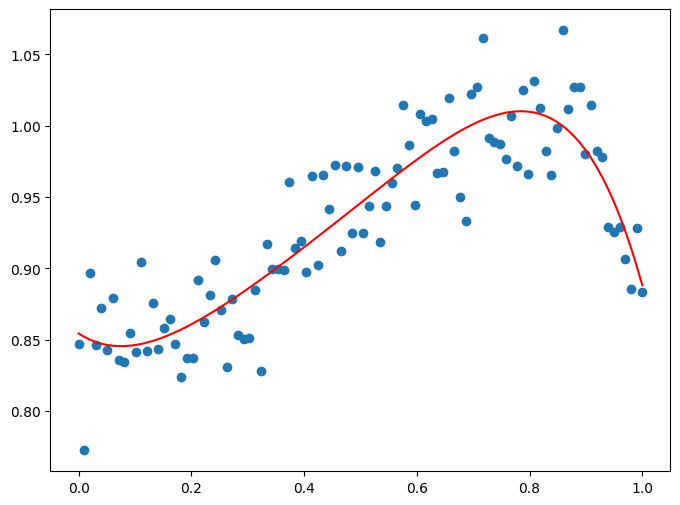

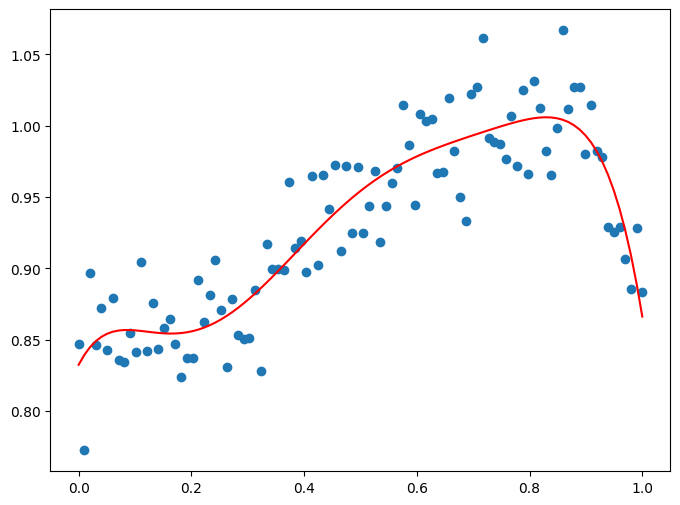

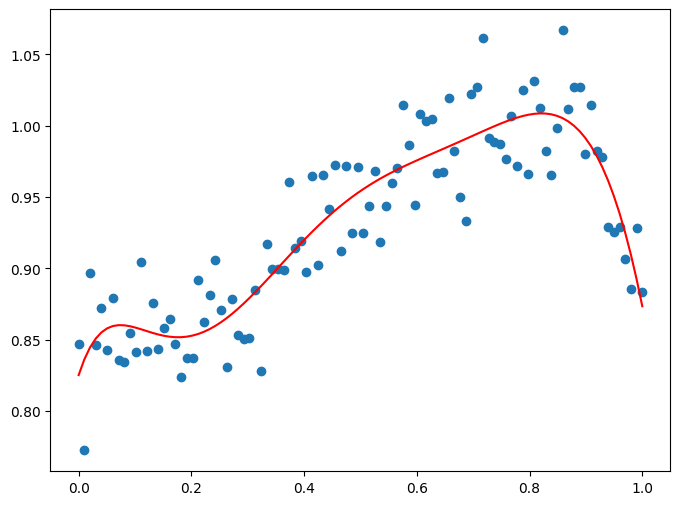

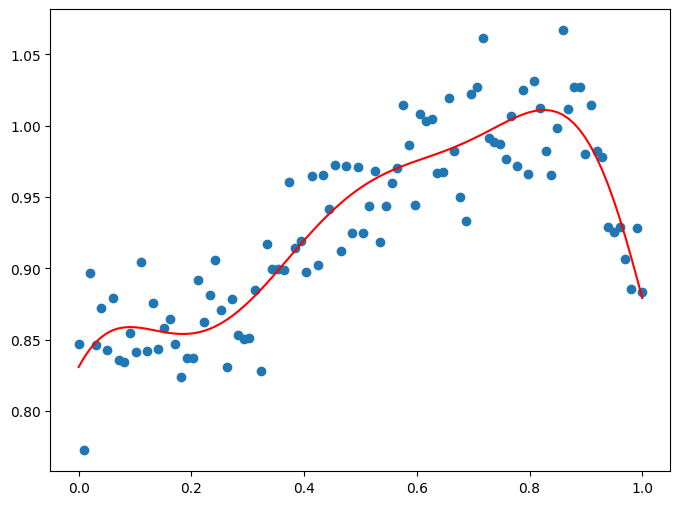

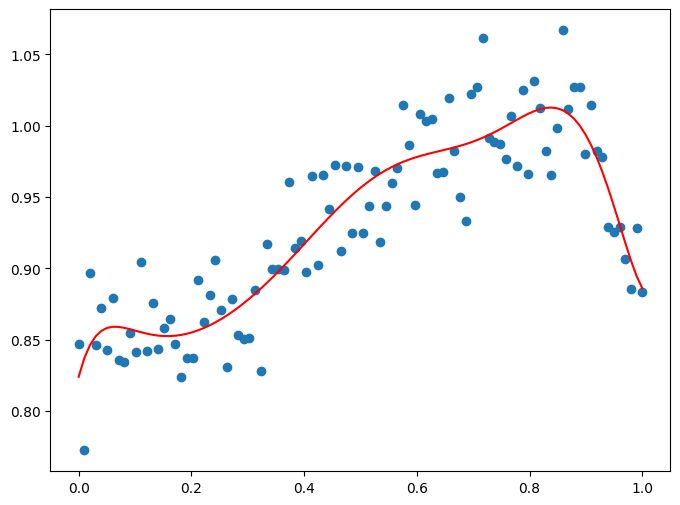

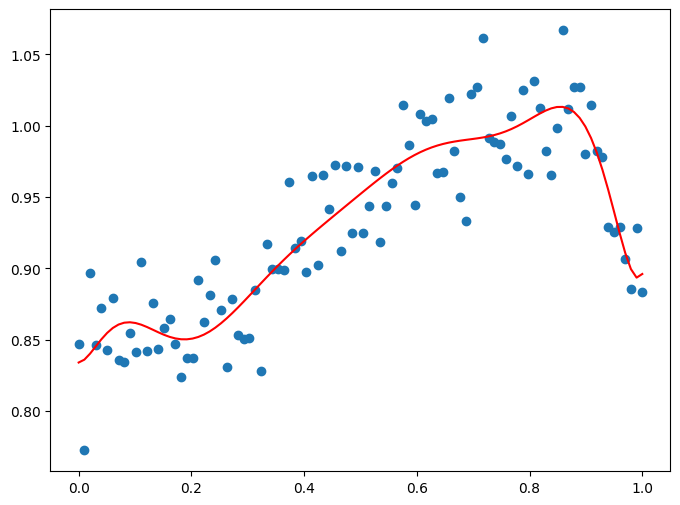

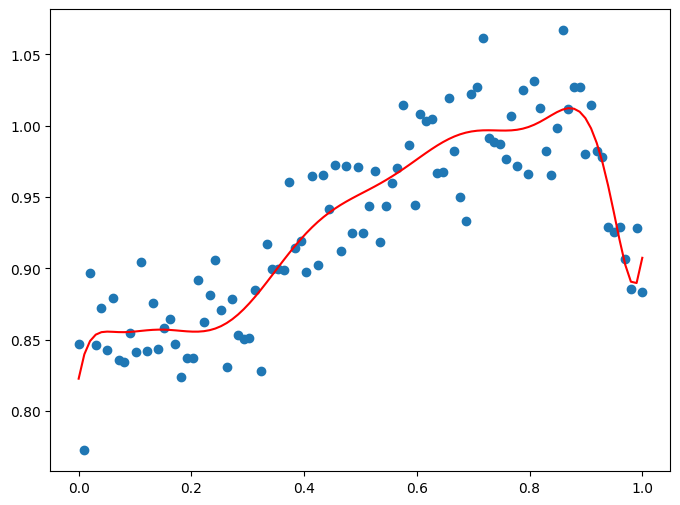

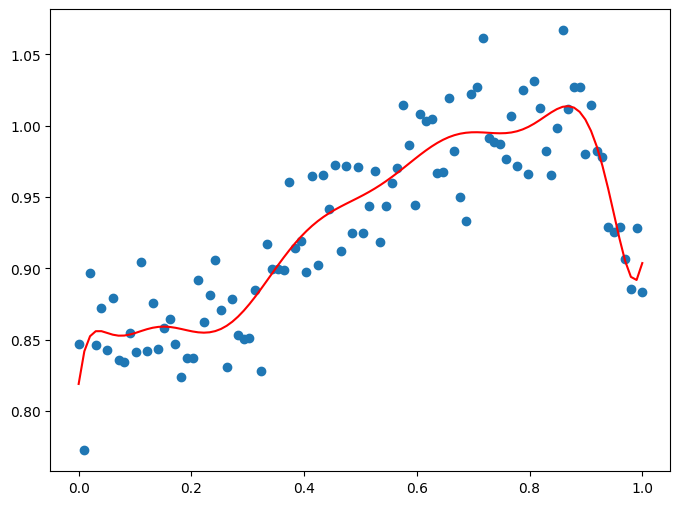

In [ ]:
# Numpy Approach

import numpy as np
import matplotlib.pyplot as plt

#Create data points

x = np.linspace(0, 1, num=100)
y = np.sin(1 + x**2)

noise = np.random.normal(0, 0.03, size=x.shape)

y_noisy = y + noise

plt.scatter(x,y_noise)
plt.show()

#Fit and draw
for degree in range(13):
    coefficients = np.polyfit(x, y_noisy, degree)
    polynomial = np.poly1d(coefficients)  # Create a polynomial function from the coefficients

    y_fitted = polynomial(x)

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y_noisy)
    plt.plot(x, y_fitted, color='red' )
    plt.show()
